In [1]:
from scipy.stats import linregress
import pandas as pd
import matplotlib.pyplot as plt

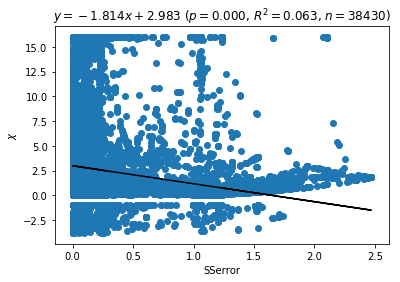

In [2]:
df = pd.read_csv("../../../data/processed/full/std/per_opponent/main.csv")
upper_chi = df["chi"].quantile(q=0.95)
lower_chi = df["chi"].quantile(q=0.05)
Y = df[(df["chi"] >= lower_chi) & (df["chi"] <= upper_chi)]["chi"]
X = df[(df["chi"] >= lower_chi) & (df["chi"] <= upper_chi)]["residual"]

slope, intercept, r_value, p_value, std_err = linregress(X, Y)

plt.figure()


plt.title(f"$y={slope:0.3f}x+{intercept:0.3f}$ ($p={p_value:0.3f}$, $R^2={round(r_value ** 2, 3)}$, $n={len(X)}$)")

plt.plot(X, slope * X + intercept, color="black")


plt.scatter(X, Y)
plt.xlabel("SSerror")
plt.ylabel("$\chi$");

Let us look at same effect but averaged over opponents:

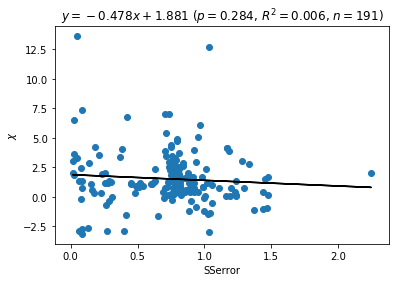

In [3]:
per_player = df.groupby("Player index")["chi", "residual"].mean()
Y = per_player[(per_player["chi"] >= lower_chi) & (per_player["chi"] <= upper_chi)]["chi"]
X = per_player[(per_player["chi"] >= lower_chi) & (per_player["chi"] <= upper_chi)]["residual"]

slope, intercept, r_value, p_value, std_err = linregress(X, Y)

plt.figure()


plt.title(f"$y={slope:0.3f}x+{intercept:0.3f}$ ($p={p_value:0.3f}$, $R^2={round(r_value ** 2, 3)}$, $n={len(X)}$)")

plt.plot(X, slope * X + intercept, color="black")


plt.scatter(X, Y)
plt.xlabel("SSerror")
plt.ylabel("$\chi$");